**Time Series Analysis with Prophet**<br/>
[Prof. Dr. Jan Kirenz](https://www.kirenz.com) <br/>
HdM Stuttgart

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-Prophet" data-toc-modified-id="Install-Prophet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install Prophet</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Fit-Prophet-Model" data-toc-modified-id="Fit-Prophet-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit Prophet Model</a></span></li><li><span><a href="#Make-Forecasts" data-toc-modified-id="Make-Forecasts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Make Forecasts</a></span></li><li><span><a href="#Plot-Forecast-Components" data-toc-modified-id="Plot-Forecast-Components-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot Forecast Components</a></span></li><li><span><a href="#Prophet-Options" data-toc-modified-id="Prophet-Options-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Prophet Options</a></span></li></ul></div>

# Time Series Analysis with Prophet

Prophet is a from Facebook developed procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

According to Facebook, it works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team.

See the [Prophet documentation](https://facebook.github.io/prophet/docs/installation.html) and Taylor/Letham (2017) for more details.

---

Source:

[Taylor SJ, Letham B. (2017) Forecasting at scale. PeerJ Preprints 5:e3190v2](https://doi.org/10.7287/peerj.preprints.3190v2)

## Install Prophet

First of all you need to install Prophet (e.g. with [conda](https://anaconda.org/conda-forge/fbprophet): conda install -c conda-forge fbprophet)

In [1]:
import pandas as pd
from fbprophet import Prophet


We will follow the instructions from Facebook to set up Prophet [Facebook, 2018](https://facebook.github.io/prophet/docs/quick_start.html)

## Import data

As an example, let’s explore the Industrial production of electric and gas utilities in the United States, from the years 1939–2019, with our frequency being monthly production output. [Data source](https://fred.stlouisfed.org/series/IPG2211A2N)

In [2]:
# Load the csv data files into pandas dataframes
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/IPG2211A2N.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 2 columns):
DATE          966 non-null object
IPG2211A2N    966 non-null float64
dtypes: float64(1), object(1)
memory usage: 15.2+ KB


In [4]:
df.head()

,DATE,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


## Fit Prophet Model

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

**Important**: The input to Prophet is *always* a dataframe with two columns: 

- ds 
- y 

The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. 

The `y` column must be numeric, and represents the measurement we wish to forecast.

In [5]:
df.columns = ['ds', 'y']

We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. 

In [6]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/jankirenz/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



## Make Forecasts

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1326,2020-05-27
1327,2020-05-28
1328,2020-05-29
1329,2020-05-30
1330,2020-05-31


The predict method will assign each row in future a predicted value which it names yhat. 

If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for *components* and *uncertainty intervals*.

In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1326,2020-05-27,102.818903,97.721188,108.291359
1327,2020-05-28,103.050258,98.203814,108.269126
1328,2020-05-29,103.380329,98.065848,108.592156
1329,2020-05-30,103.806062,98.945898,109.251599
1330,2020-05-31,104.321465,98.951994,109.315662


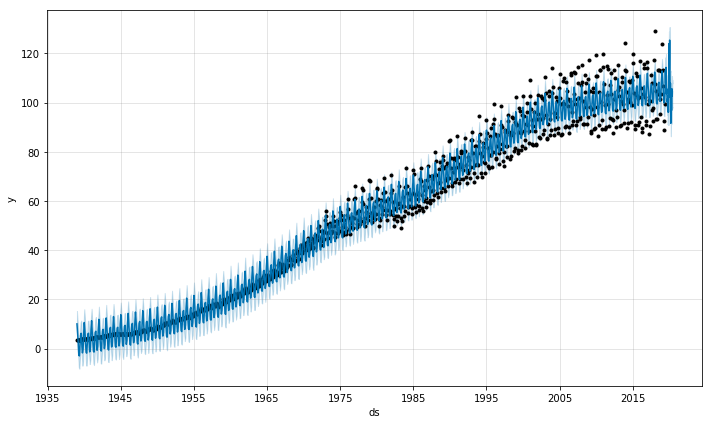

In [9]:
fig1 = m.plot(forecast)

## Plot Forecast Components

If you want to see the forecast components, you can use the `Prophet.plot_components` method. 

By default you’ll see the *trend*, *yearly seasonality*, and *weekly* (if aivailable in `ds`) seasonality of the time series. 

If you include holidays, you’ll see those here, too.

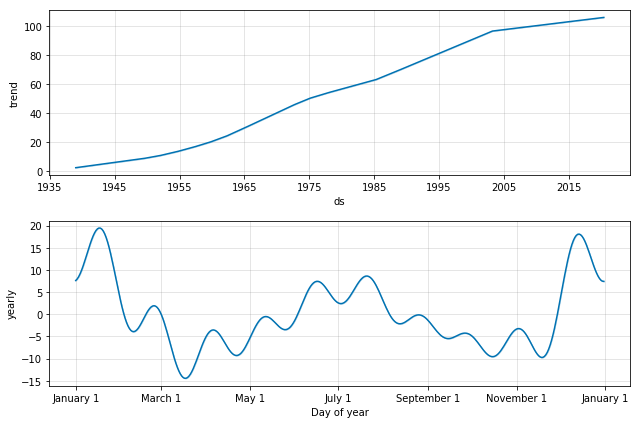

In [10]:
fig2 = m.plot_components(forecast)

## Prophet Options

More details about the options available for each method are available in the docstrings, for example, via `help(Prophet)` or `help(Prophet.fit)`. 

In [11]:
help(Prophet) 

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly from
 |      the first `changepoint_range` proportion of the history.
 |  changepoint_range: Proportion of history in which trend changepoints will
 |      be estimated. Defaults to 0.8 for the first 80%. Not used if
 |      `changepoints` is specified.
 |  Not used if input `changepoints` is supplied.
 |  yearly_seasonality: Fit yearly seasonality.
 |      Can be 'auto', True, Fals

In [12]:
help(Prophet.fit)

Help on function fit in module fbprophet.forecaster:

fit(self, df, **kwargs)
    Fit the Prophet model.
    
    This sets self.params to contain the fitted model parameters. It is a
    dictionary parameter names as keys and the following items:
        k (Mx1 array): M posterior samples of the initial slope.
        m (Mx1 array): The initial intercept.
        delta (MxN array): The slope change at each of N changepoints.
        beta (MxK matrix): Coefficients for K seasonality features.
        sigma_obs (Mx1 array): Noise level.
    Note that M=1 if MAP estimation.
    
    Parameters
    ----------
    df: pd.DataFrame containing the history. Must have columns ds (date
        type) and y, the time series. If self.growth is 'logistic', then
        df must also have a column cap that specifies the capacity at
        each ds.
    kwargs: Additional arguments passed to the optimizing or sampling
        functions in Stan.
    
    Returns
    -------
    The fitted Prophet objec